## Outline

1. Data Preparation
2. Data Exploration
3. EDA

In [ ]:
!pip3 install deeplake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Download speech audio from Kaggle

In [7]:
# descargar dataset kaggle
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio 
# unzip en folder ./data/
!unzip -qq ./data/ravdess-emotional-speech-audio -d  ./data/

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: unrecognized arguments: ./data/ravdess-emotional-speech-audio


1. Data Preparation

In [6]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [9]:
# data path
Ravdess = "./data/audio_speech_actors_01-24/"

In [10]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,angry,./data/audio_speech_actors_01-24/Actor_01/03-0...
1,calm,./data/audio_speech_actors_01-24/Actor_01/03-0...
2,fear,./data/audio_speech_actors_01-24/Actor_01/03-0...
3,angry,./data/audio_speech_actors_01-24/Actor_01/03-0...
4,sad,./data/audio_speech_actors_01-24/Actor_01/03-0...


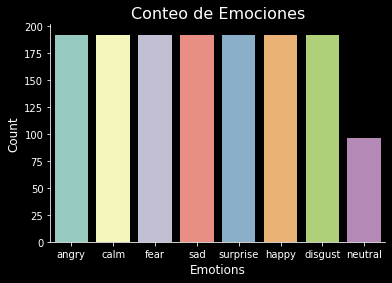

In [15]:
plt.title('Conteo de Emociones', size=16)
sns.countplot(x=Ravdess_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()


# Observaciones

- Tiene un buen balance y los archivos tienen bastante claridad, existe la misma cantidad de mujeres y hombres en el dataset, además de que existe la misma cantidad de archivos por emociones, evitando el class imbalance. 
- Existe mayor cantidad de investigaciones aplicadas a este dataset.
- Buen posible candidato